# Projects in AI & ML HW 3

### Dataset

In your project, you will pick a dataset (not the same as in the previous homeworks) and 
describe the problem you would like to solve. Include a link to the dataset source. It is highly recommended that you pick a dataset with at least 10,000 (or more observations. There are many ways of describing a big dataset and one way to describe it is – a big dataset is more complex. Complexity can refer to the number of observations, features, or the type of data. For this project, there is no restriction to the number of features your dataset has. However, having more features gives you greater ability to apply the techniques discussed in class. Next, you should pick a Deep Learning Framework that you would like to use to implement your 2-layer Neural Network. 


This time, I chose [this dataset](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart) called 'Cost prediction on acquiring customers'. The dataset is composed of various features about the cusomter and their purchase, along with the cost associated with advertising to that customer. I chose this dataset because I felt that there could be a complex relationship here that could be learned well by MLP, as well as the fact that it has 60K data points.

In [1]:
# same deal for gdrive and kaggle
from google.colab import drive
drive.mount('/content/drive')

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/.kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle


# download 

Mounted at /content/drive
rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
# install dataset and unzip

!rm -r dataset
!kaggle datasets download -d ramjasmaurya/medias-cost-prediction-in-foodmart
!mkdir dataset
!unzip medias-cost-prediction-in-foodmart.zip -d dataset

rm: cannot remove 'dataset': No such file or directory
medias-cost-prediction-in-foodmart.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  medias-cost-prediction-in-foodmart.zip
  inflating: dataset/media prediction and its cost.csv  


### Task 1 (10 points): 

Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular 
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)
For example, some of the known resources for TensorFlow are:
https://www.tensorflow.org/guide/autodiff
https://www.tensorflow.org/api_docs/python/tf/GradientTape
Hint: You need to figure out the APIs/packages used to implement forward propagation and 
backward propagation. 

In this homework, I will be using the Pytorch library and its tools to implement a 2 layer neural network. I will implement the neural network class as a subclass of the Net module using Linear layers and various activation functions, such as RELU, softmax and cross entrophy to complete the neural network.

### Task 2 (60 points): 

Once you have figured the resources you need for the project, design, and 
implement your project. The project must include the following steps (it’s not limited to these 
steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).
Projects in Machine Learning and AI (RPI Fall 2022)
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your data and project can be used) to train your model. In this step it is up to you as someone in charge of their project to improvise using optimization algorithms (Adams, RMSProp etc.) and/or regularization.
6. Present the results using the test set.
NOTE: In this step, once you have implemented your 2-layer network you may increase and/or decrease the number of layers as part of the hyperparameter tuning process.



For this homework, I will be choosing the 'store sales' feature as the label variable. 

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


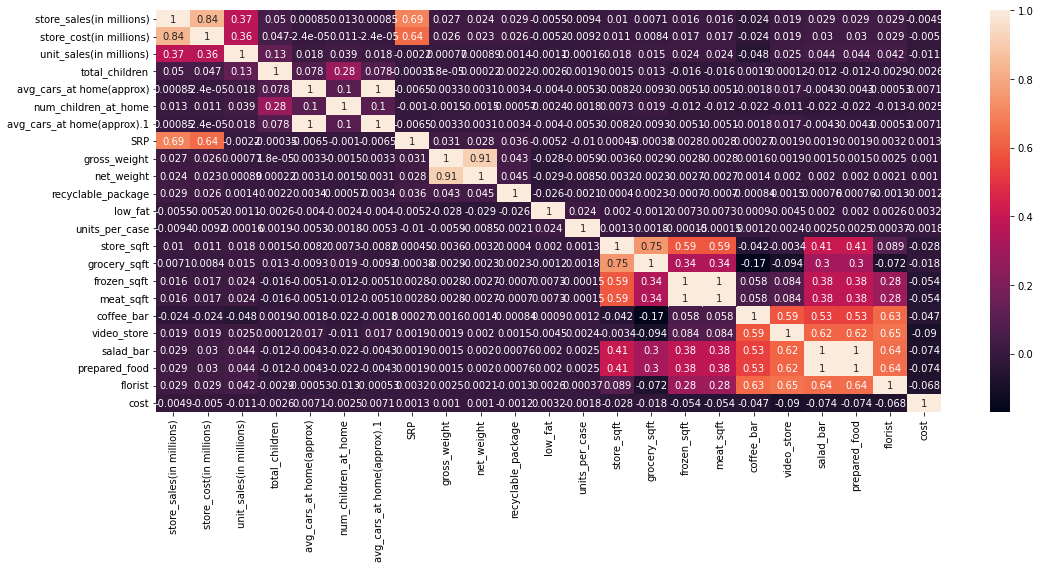

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


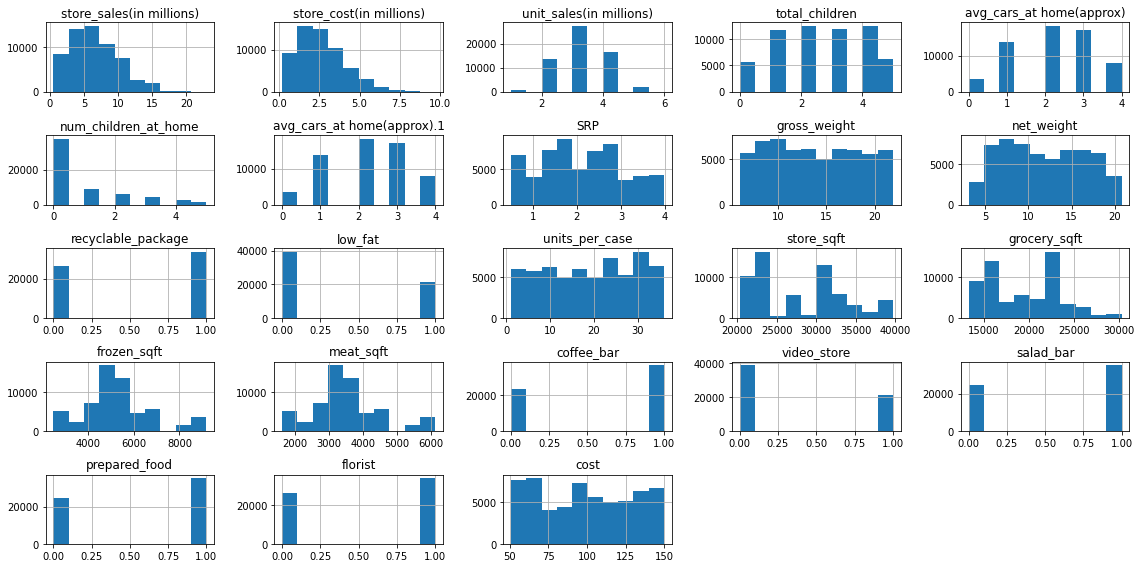

In [51]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('dataset/media prediction and its cost.csv')
display(raw_data.head())


fig,ax = plt.subplots(figsize=(16,8))
# is it a good thing?? Low correlations accross many features but some seem to be highly correlated.. might have to prune features
sns.heatmap(raw_data.corr(method='kendall'),annot=True,ax=ax)
plt.tight_layout()
plt.show()
# sns.histplot(raw_data,ax = axes[1])

# checking the distribution of features, we are seeing some good spread in most values except for a few that appear binary
fig,ax = plt.subplots(figsize=(16,8))
raw_data.hist(ax=ax)
plt.tight_layout()
plt.show()


In [56]:
# preprocessing the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# split needs to happen before normalization
y = raw_data.pop('store_sales(in millions)')
X_train,X_test,y_train,y_test = train_test_split(raw_data,y,test_size=0.2,random_state=0)


# since some columns of the dataset are categorical variables, we need to encode them somehow for the NN

# handle numeric features
# numeric_features = raw_data.columns[~raw_data.dtypes=='object']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# handle categorical features
# categorical_features = raw_data.columns[raw_data.dtypes=='object']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

# processed_data = preprocessor.fit_transform(raw_data)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

# ensure features are same shape (because we are 1-hot encoding)
X_train.shape[1]== X_test.shape[1]

((48342, 330), (12086, 330))

### Task 3 (10 points): 

In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use 
an optimization algorithm? Why or why not?


### Task 4 (20 points): 

Create another baseline model (can be any model we covered so far except a 
deep learning model). Using the same training data (as above) train your model and evaluate results using the test set. Compare the results of both models (the Neural Network and the baseline model). What are the reasons for one model performing better (or not) than the other? Explain.